In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from uszipcode import SearchEngine
search = SearchEngine()

import utils as u
#from config.counties_zips import zip_codes,counties

In [2]:
zip_df = pd.read_csv("config/standard_ZIP_codes.csv")
zip_codes = list(zip_df["x"])
zip_codes

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98012,
 98014,
 98019,
 98020,
 98021,
 98022,
 98023,
 98024,
 98026,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98036,
 98037,
 98038,
 98039,
 98040,
 98042,
 98043,
 98045,
 98047,
 98051,
 98052,
 98053,
 98055,
 98056,
 98057,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98087,
 98092,
 98101,
 98102,
 98103,
 98104,
 98105,
 98106,
 98107,
 98108,
 98109,
 98110,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98121,
 98122,
 98125,
 98126,
 98133,
 98134,
 98136,
 98144,
 98146,
 98148,
 98154,
 98155,
 98158,
 98164,
 98166,
 98168,
 98174,
 98177,
 98178,
 98188,
 98195,
 98198,
 98199,
 98201,
 98203,
 98204,
 98205,
 98207,
 98208,
 98220,
 98221,
 98222,
 98223,
 98225,
 98226,
 98229,
 98230,
 98232,
 98233,
 98236,
 98237,
 98239,
 98240,
 98241,
 98244,
 98245,
 98247,
 98248,
 98249,
 98250,
 98251,
 98252,
 98253,
 98257,
 98258,
 98260,
 98261,


In [3]:
df = pd.read_csv("data/df.csv")
#df["time"] = pd.to_datetime(df["time"]).dt.date
df = df.fillna(0)
df = df[df["zip"].isin(zip_codes)]

In [4]:
df.head()

,time,zip,county,gas_price,n_ev,n_bev,n_phev,m_ev,m_bev,m_phev,n_evse
0,2017-01-31,98001,King,2.743,73.0,34.0,39.0,43,24,20,0
1,2017-01-31,98002,King,2.743,32.0,17.0,15.0,43,24,20,2
2,2017-01-31,98003,King,2.743,54.0,22.0,32.0,43,24,20,1
3,2017-01-31,98004,King,2.743,397.0,306.0,91.0,43,24,20,16
4,2017-01-31,98005,King,2.743,194.0,138.0,56.0,43,24,20,1


In [5]:
df.describe()

,zip,gas_price,n_ev,n_bev,n_phev,m_ev,m_bev,m_phev,n_evse
count,31560.000000,31560.000000,31560.000000,31560.000000,31560.000000,31560.000000,31560.000000,31560.000000,31560.000000
mean,98608.665399,3.123050,91.399018,63.658397,27.740621,75.966667,33.650000,44.900000,1.360425
std,404.333663,0.360615,177.858429,138.478006,42.389877,17.144723,6.079639,12.049672,3.814744
min,98001.000000,2.356000,0.000000,0.000000,0.000000,43.000000,24.000000,20.000000,0.000000
25%,98272.000000,2.855250,2.000000,1.000000,1.000000,63.000000,29.000000,36.000000,0.000000
50%,98563.500000,3.062000,19.000000,11.000000,8.000000,76.000000,32.000000,46.000000,0.000000
75%,99001.000000,3.360000,100.250000,61.000000,39.000000,92.250000,37.250000,57.000000,1.000000
max,99403.000000,3.864000,2224.000000,1848.000000,377.000000,107.000000,46.000000,65.000000,101.000000


In [6]:
df.dtypes

time          object
zip            int64
county        object
gas_price    float64
n_ev         float64
n_bev        float64
n_phev       float64
m_ev           int64
m_bev          int64
m_phev         int64
n_evse         int64
dtype: object

In [8]:
# dff = df[df["time"] == "2017-01-31"]
dff = df[df["time"] == "2021-12-31"]

In [73]:
dff.tail()

,time,zip,county,gas_price,n_ev,n_bev,n_phev,m_ev,m_bev,m_phev,n_evse
35874,2021-12-31,99362,Walla Walla,3.826,182.0,117.0,65.0,107,46,65,15
35876,2021-12-31,99371,Adams,3.826,0.0,0.0,0.0,107,46,65,0
35877,2021-12-31,99401,Asotin,3.826,0.0,0.0,0.0,107,46,65,0
35878,2021-12-31,99402,Asotin,3.826,8.0,8.0,0.0,107,46,65,0
35879,2021-12-31,99403,Asotin,3.826,30.0,10.0,20.0,107,46,65,1


In [74]:
dff.sum()

time         2021-12-312021-12-312021-12-312021-12-312021-1...
zip                                                   51868158
county       KingKingKingKingKingKingKingKingKingKingSnohom...
gas_price                                             2012.476
n_ev                                                   82142.0
n_bev                                                  61358.0
n_phev                                                 20784.0
m_ev                                                     56282
m_bev                                                    24196
m_phev                                                   34190
n_evse                                                    1590
dtype: object

In [75]:
dff.describe()

,zip,gas_price,n_ev,n_bev,n_phev,m_ev,m_bev,m_phev,n_evse
count,526.000000,5.260000e+02,526.000000,526.000000,526.000000,526.0,526.0,526.0,526.000000
mean,98608.665399,3.826000e+00,156.163498,116.650190,39.513308,107.0,46.0,65.0,3.022814
std,404.712147,1.822499e-14,271.144684,218.048477,56.463244,0.0,0.0,0.0,7.962738
min,98001.000000,3.826000e+00,0.000000,0.000000,0.000000,107.0,46.0,65.0,0.000000
25%,98272.250000,3.826000e+00,4.000000,2.000000,2.000000,107.0,46.0,65.0,0.000000
50%,98563.500000,3.826000e+00,36.000000,23.500000,12.000000,107.0,46.0,65.0,1.000000
75%,98989.000000,3.826000e+00,182.000000,129.750000,58.000000,107.0,46.0,65.0,3.000000
max,99403.000000,3.826000e+00,2215.000000,1848.000000,367.000000,107.0,46.0,65.0,101.000000


In [76]:
(dff["n_bev"] == 0).sum()

74

In [53]:
dfff = df.loc[(df["zip"].isin([98104, 98273])) & (df["time"].isin(["2017-01-31", "2017-02-28", "2017-03-31"])), ["time", "zip", "county", "n_ev", "n_bev", "n_phev"]]

In [54]:
dfff

,time,zip,county,n_ev,n_bev,n_phev
57,2017-01-31,98104,King,82.0,34.0,48.0
141,2017-01-31,98273,Skagit,30.0,19.0,11.0
655,2017-02-28,98104,King,87.0,37.0,50.0
739,2017-02-28,98273,Skagit,32.0,20.0,12.0
1253,2017-03-31,98104,King,90.0,40.0,50.0
1337,2017-03-31,98273,Skagit,33.0,20.0,13.0


In [24]:
county_counts = dff.groupby("county")["n_bev"].sum().sort_values(ascending=False)
county_counts_rel = county_counts/county_counts.sum()
county_counts

county
King            34523.0
Snohomish        6642.0
Pierce           4070.0
Clark            3424.0
Kitsap           2082.0
Thurston         1815.0
Whatcom          1553.0
Spokane          1254.0
Skagit            707.0
Island            686.0
Benton            634.0
San Juan          421.0
Chelan            389.0
Clallam           359.0
Jefferson         357.0
Cowlitz           291.0
Yakima            280.0
Mason             263.0
Lewis             210.0
Grays Harbor      197.0
Franklin          160.0
Kittitas          157.0
Walla Walla       151.0
Grant             131.0
Douglas           109.0
Klickitat          87.0
Stevens            83.0
Whitman            77.0
Okanogan           59.0
Pacific            54.0
Skamania           39.0
Adams              20.0
Asotin             18.0
Pend Oreille       17.0
Wahkiakum          15.0
Ferry              10.0
Lincoln             8.0
Columbia            6.0
Garfield            0.0
Name: n_bev, dtype: float64

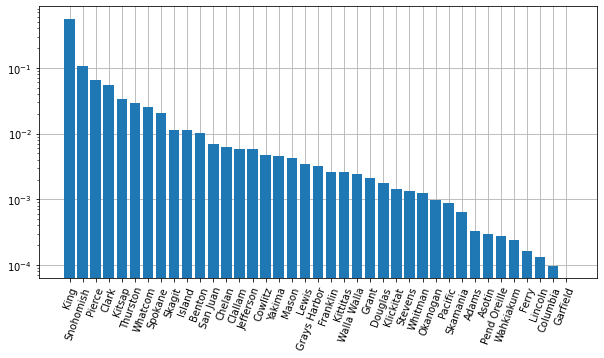

In [38]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(county_counts_rel.index, county_counts_rel, zorder=2)

plt.xticks(rotation=70, ha="right", rotation_mode='anchor')
# if absrel=="abs":
#     ax.set_ylabel("Number of EVs")
# elif absrel=="rel":
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#     ax.set_ylabel("Fraction of all EVs")

# ax.set_xlim(-0.6, 20.6)

u.fig_ax_setup([fig,ax], yscale="log")

# if save:
#     filename = self.folder + by + ".png"
#     u.save_figure(fig, filename)